import data and libraries

In [1]:
import pandas as pd
from helpers.data_preprocessing import DataProcesser

df = pd.read_csv("./../../data/code_data.csv", usecols=['comment'])
df.head()

,comment
0,public static void showContextMenu(TextArea te...
1,TABLE_ICONS.put(SpecialField.PRINTED
2,BindingsHelper.bindBidirectional(valueProperty()
3,private boolean confirmClose(BasePanel panel) {
4,INTEGRITY_INFO(MaterialDesignIcon.INFORMATION)


Preprocess comments:
1. Separate words from camel case and snake case,
2. To lower case,
3. Remove java tags,
4. remove accented chars,
5. stem

In [2]:
dp = DataProcesser()
#df['a'] = df['a'].apply(lambda x: x + 1)
df['comment'] = df['comment'].apply(str)
df['comment'] = df['comment'].apply(dp.extract_camel_case)
df['comment'] = df['comment'].apply(dp.extract_snake_case)
df['comment'] = df['comment'].apply(dp.preprocess)
df.head()

,comment
0,public static void show context menu text area...
1,tabl icon put special field print
2,bind helper bind bidirect valu properti
3,privat boolean confirm close base panel panel
4,integr info materi design icon inform


Get most frequent comment words

In [3]:
from helpers.textual_analysis import *

code = get_most_common_words(df['comment'])
code.most_common(15)

[('public', 336),
 ('get', 285),
 ('entri', 248),
 ('file', 199),
 ('string', 179),
 ('class', 169),
 ('void', 146),
 ('field', 136),
 ('new', 134),
 ('privat', 116),
 ('list', 115),
 ('type', 109),
 ('bib', 109),
 ('if', 107),
 ('databas', 93)]

Word cloud

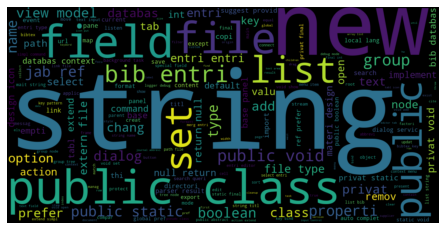

In [4]:
create_word_cloud(df['comment'])

Remove Java keywords

In [16]:
df = pd.read_csv("./../../data/code_data.csv", usecols=['comment'])
df['comment'] = df['comment'].apply(str)
df['comment'] = df['comment'].apply(dp.extract_camel_case)
df['comment'] = df['comment'].apply(dp.extract_snake_case)
df['comment'] = df['comment'].apply(dp.remove_java_keywords)
df['comment'] = df['comment'].apply(dp.preprocess)

df['comment'].head()

0      show context menu text area text area
1          tabl icon put special field print
2    bind helper bind bidirect valu properti
3             confirm close base panel panel
4      integr info materi design icon inform
Name: comment, dtype: object

Get most frequent comment words after removing java keywords

In [17]:
from helpers.textual_analysis import *

code = get_most_common_words(df['comment'])
code.most_common(15)

[('get', 285),
 ('file', 199),
 ('string', 179),
 ('en', 178),
 ('field', 136),
 ('list', 115),
 ('type', 109),
 ('bib', 109),
 ('databas', 93),
 ('dialog', 93),
 ('group', 92),
 ('set', 90),
 ('to', 83),
 ('entri', 76),
 ('text', 71)]

Word cloud

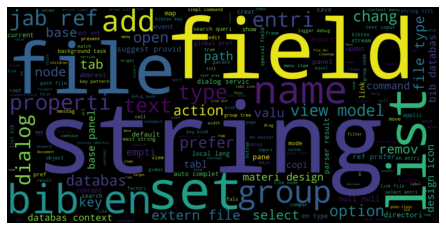

In [18]:
create_word_cloud(df['comment'])